# netflix data analysis


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [12]:
data = pd.read_csv("/content/netflix1.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [13]:
# null values
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [14]:
# drop duplicate values
data = data.drop_duplicates()

In [15]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [16]:
data.dropna(subset=['director',  'country'],inplace=True)

In [17]:
# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

In [18]:
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [20]:
data.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [21]:
type_count = data['type'].value_counts()
print(type_count)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


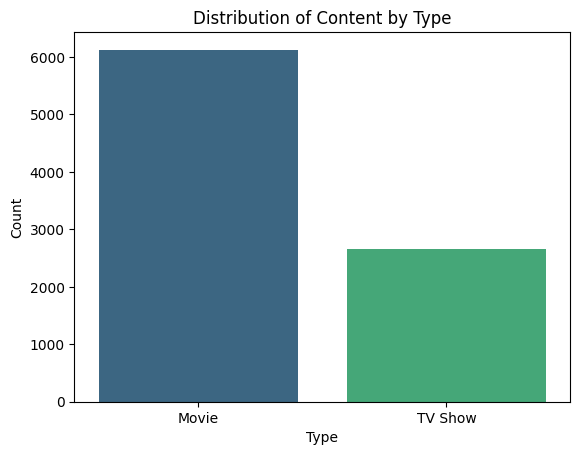

In [22]:
sns.barplot(x=type_count.index, y=type_count.values,
palette='viridis')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

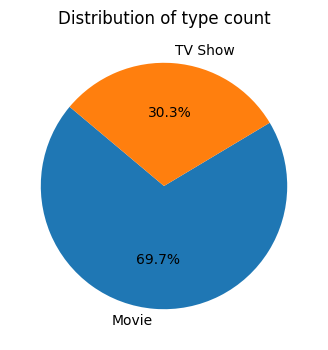

In [23]:
plt.figure(figsize=(4, 4))
plt.pie(type_count, labels=type_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of type count")
plt.show()

In [24]:
# rating count on netflix
rating_count = data['rating'].value_counts()
print(rating_count)


rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


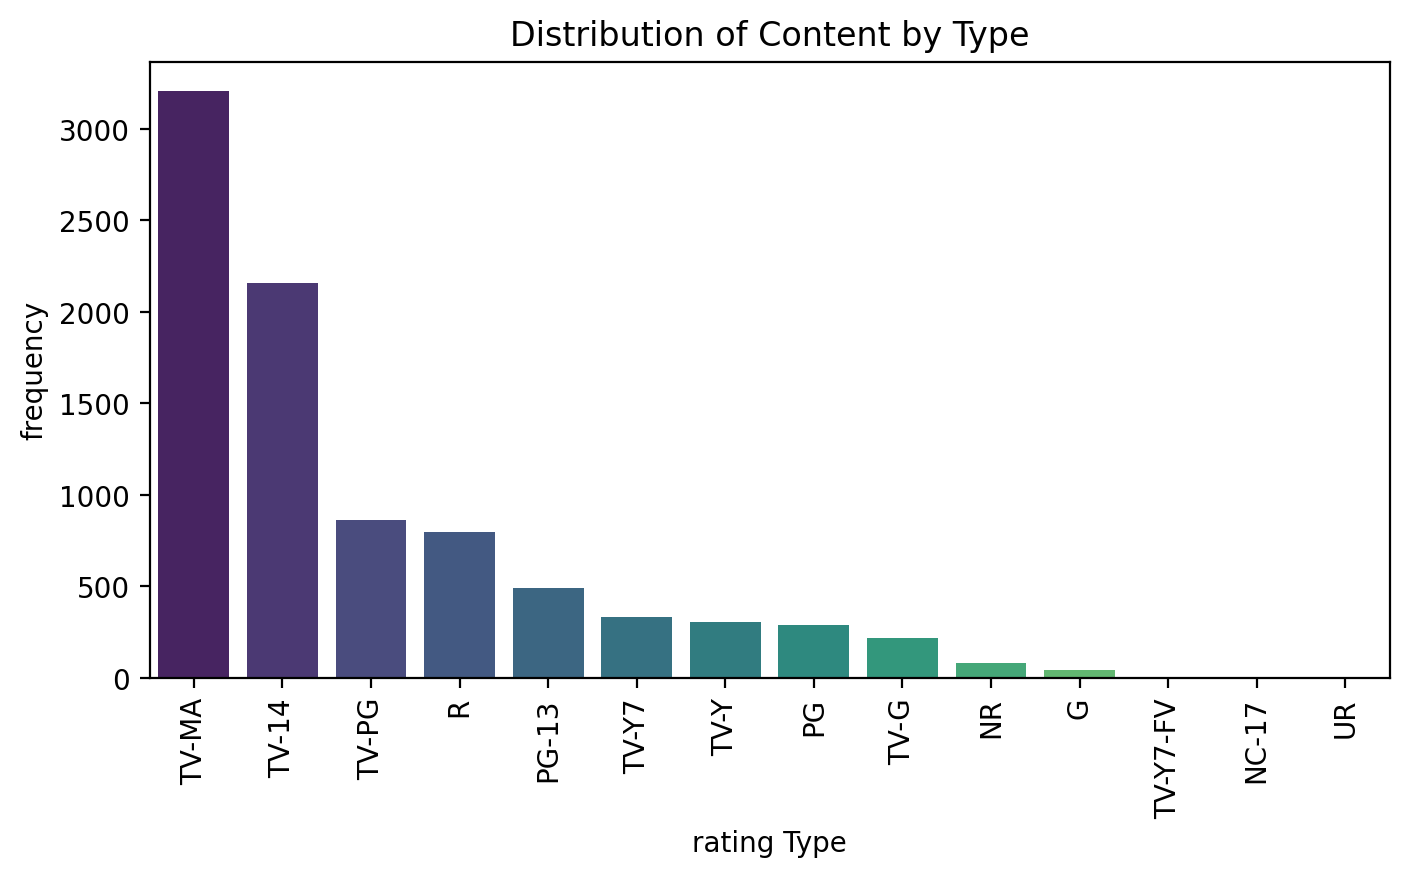

In [25]:
plt.figure(figsize=(8, 4),dpi=200)
sns.barplot(x=rating_count.index, y=rating_count.values,palette='viridis')
plt.title('Distribution of Content by Type')
plt.xlabel('rating Type')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.show()

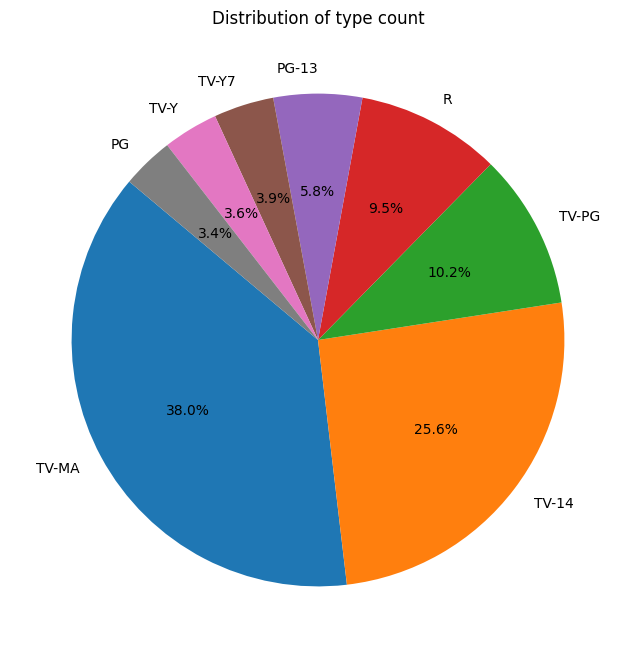

In [26]:
plt.figure(figsize=(8,8))
plt.pie(rating_count[:8], labels=rating_count.index[:8], autopct='%1.1f%%', startangle=140)
plt.title("Distribution of type count")
plt.show()

In [27]:
# top 20 countries
top_country = data['country'].value_counts().sort_values(ascending=False)[:20]
print(top_country)

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Egypt              123
Australia          114
Turkey             112
Nigeria            105
Germany            104
China              100
Brazil              88
Taiwan              86
Indonesia           86
Name: count, dtype: int64


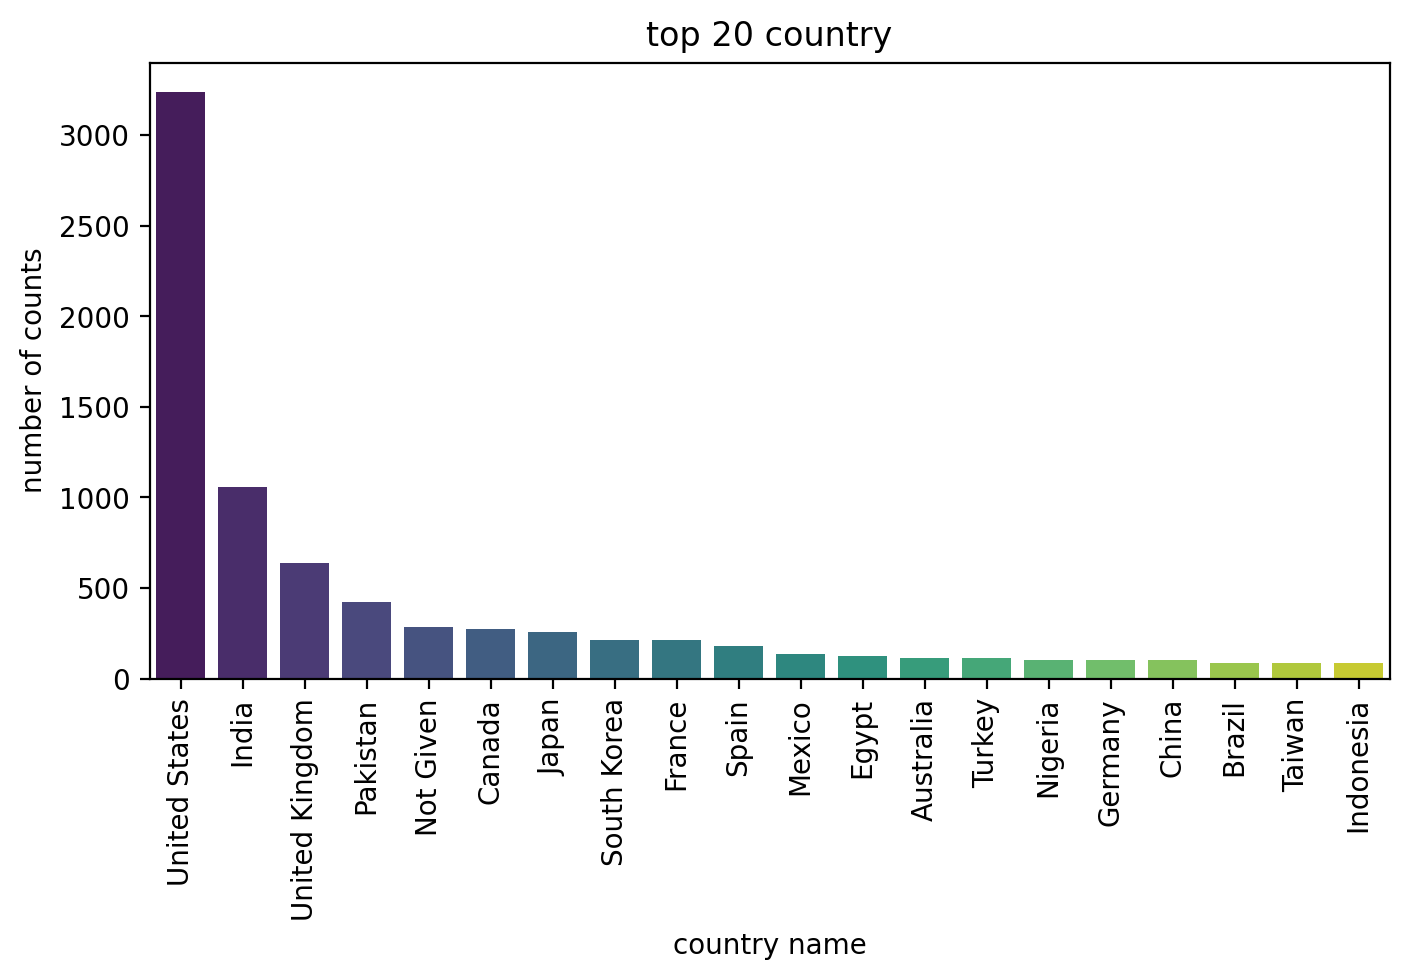

In [28]:
plt.figure(figsize=(8, 4),dpi=200)
sns.barplot(x=top_country.index, y=top_country.values,palette='viridis')
plt.title('top 20 country')
plt.xlabel('country name')
plt.ylabel('number of counts')
plt.xticks(rotation=90)
plt.show()

In [29]:
data['year_added'] = data['date_added'].dt.year

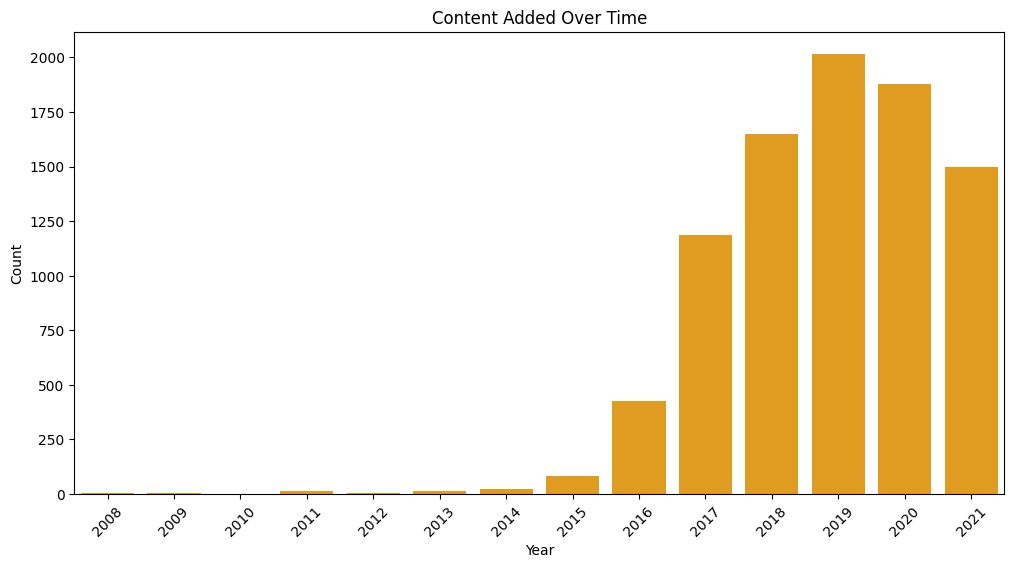

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, color='orange')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [31]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

In [32]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,year,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,2021,9,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,2021,9,24
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,2021,9,22
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,2021,9,24


In [33]:
monthly_movie_release=data[data['type']=='Movie']['month'].value_counts().sort_index()
print(monthly_movie_release)

month
1     545
2     382
3     528
4     549
5     439
6     492
7     565
8     518
9     518
10    545
11    498
12    547
Name: count, dtype: int64


In [34]:
monthly_series_release=data[data['type']=='TV Show']['month'].value_counts().sort_index()
print(monthly_series_release)

month
1     192
2     180
3     213
4     214
5     193
6     236
7     262
8     236
9     251
10    215
11    207
12    265
Name: count, dtype: int64


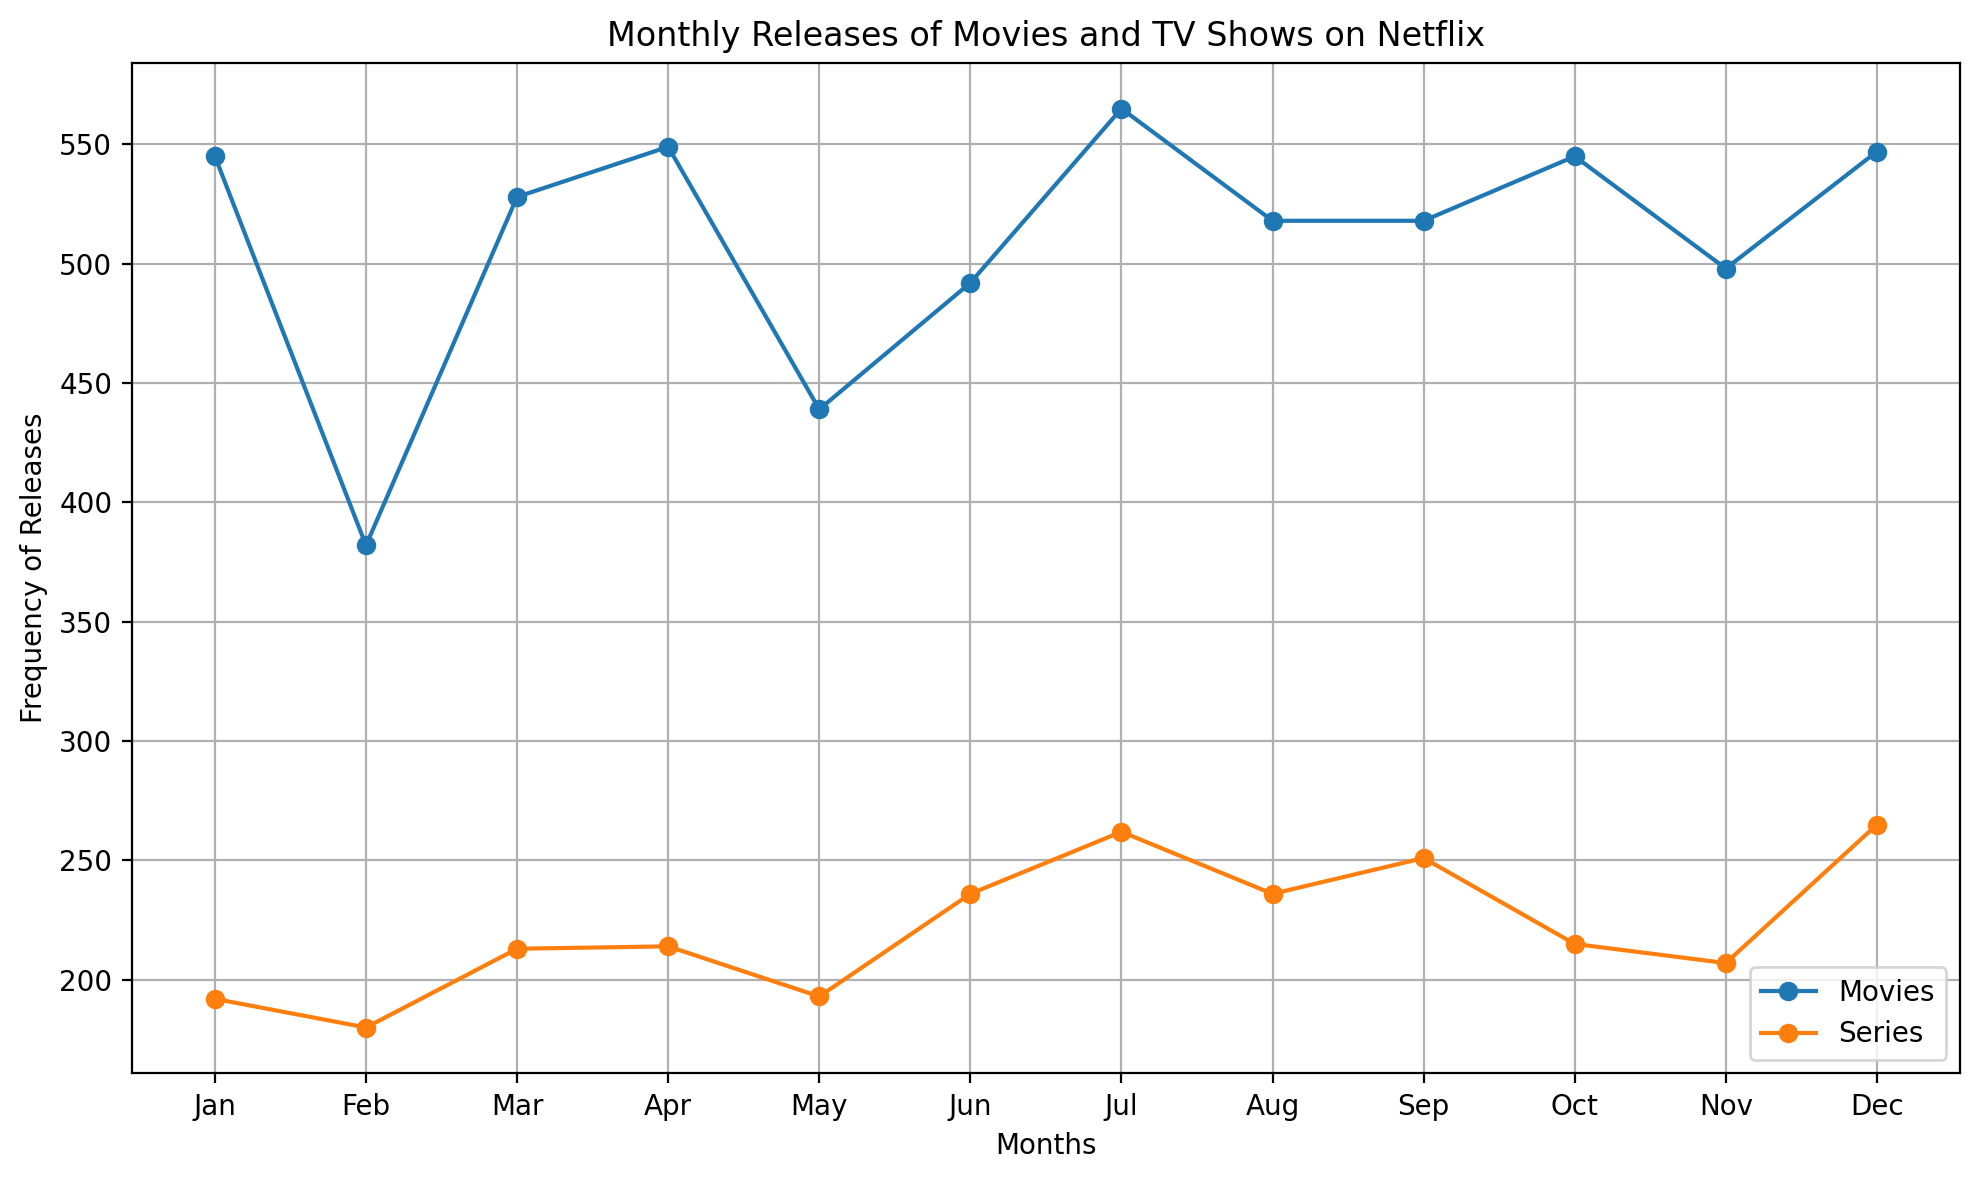

In [35]:
plt.figure(figsize=(10, 6),dpi=200)
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies', marker='o')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series', marker='o')

# Customize the plot
plt.xlabel("Months")
plt.ylabel("Frequency of Releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly Releases of Movies and TV Shows on Netflix")
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

In [36]:
yearly_movie_releases=data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=data[data['type']=='TV Show']['year'].value_counts().sort_index()

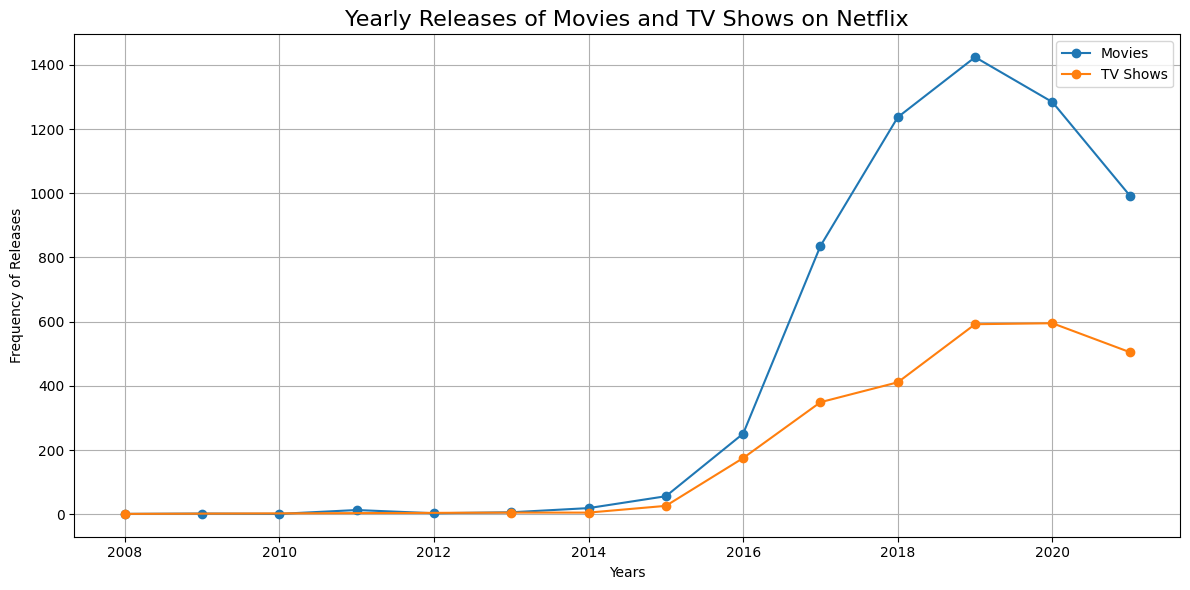

In [37]:

plt.figure(figsize=(12, 6))
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies', marker='o')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows', marker='o')

# Customize the plot
plt.xlabel("Years")
plt.ylabel("Frequency of Releases")
plt.title("Yearly Releases of Movies and TV Shows on Netflix", fontsize=16)
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [38]:
data['genres'] = data['listed_in'].apply(lambda x : x.split(','))
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,year,month,day,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,2021,9,25,[Documentaries]
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,2021,9,24,"[Crime TV Shows, International TV Shows, TV ..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,2021,9,24,"[TV Dramas, TV Horror, TV Mysteries]"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,2021,9,22,"[Children & Family Movies, Comedies]"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,2021,9,24,"[Dramas, Independent Movies, International M..."


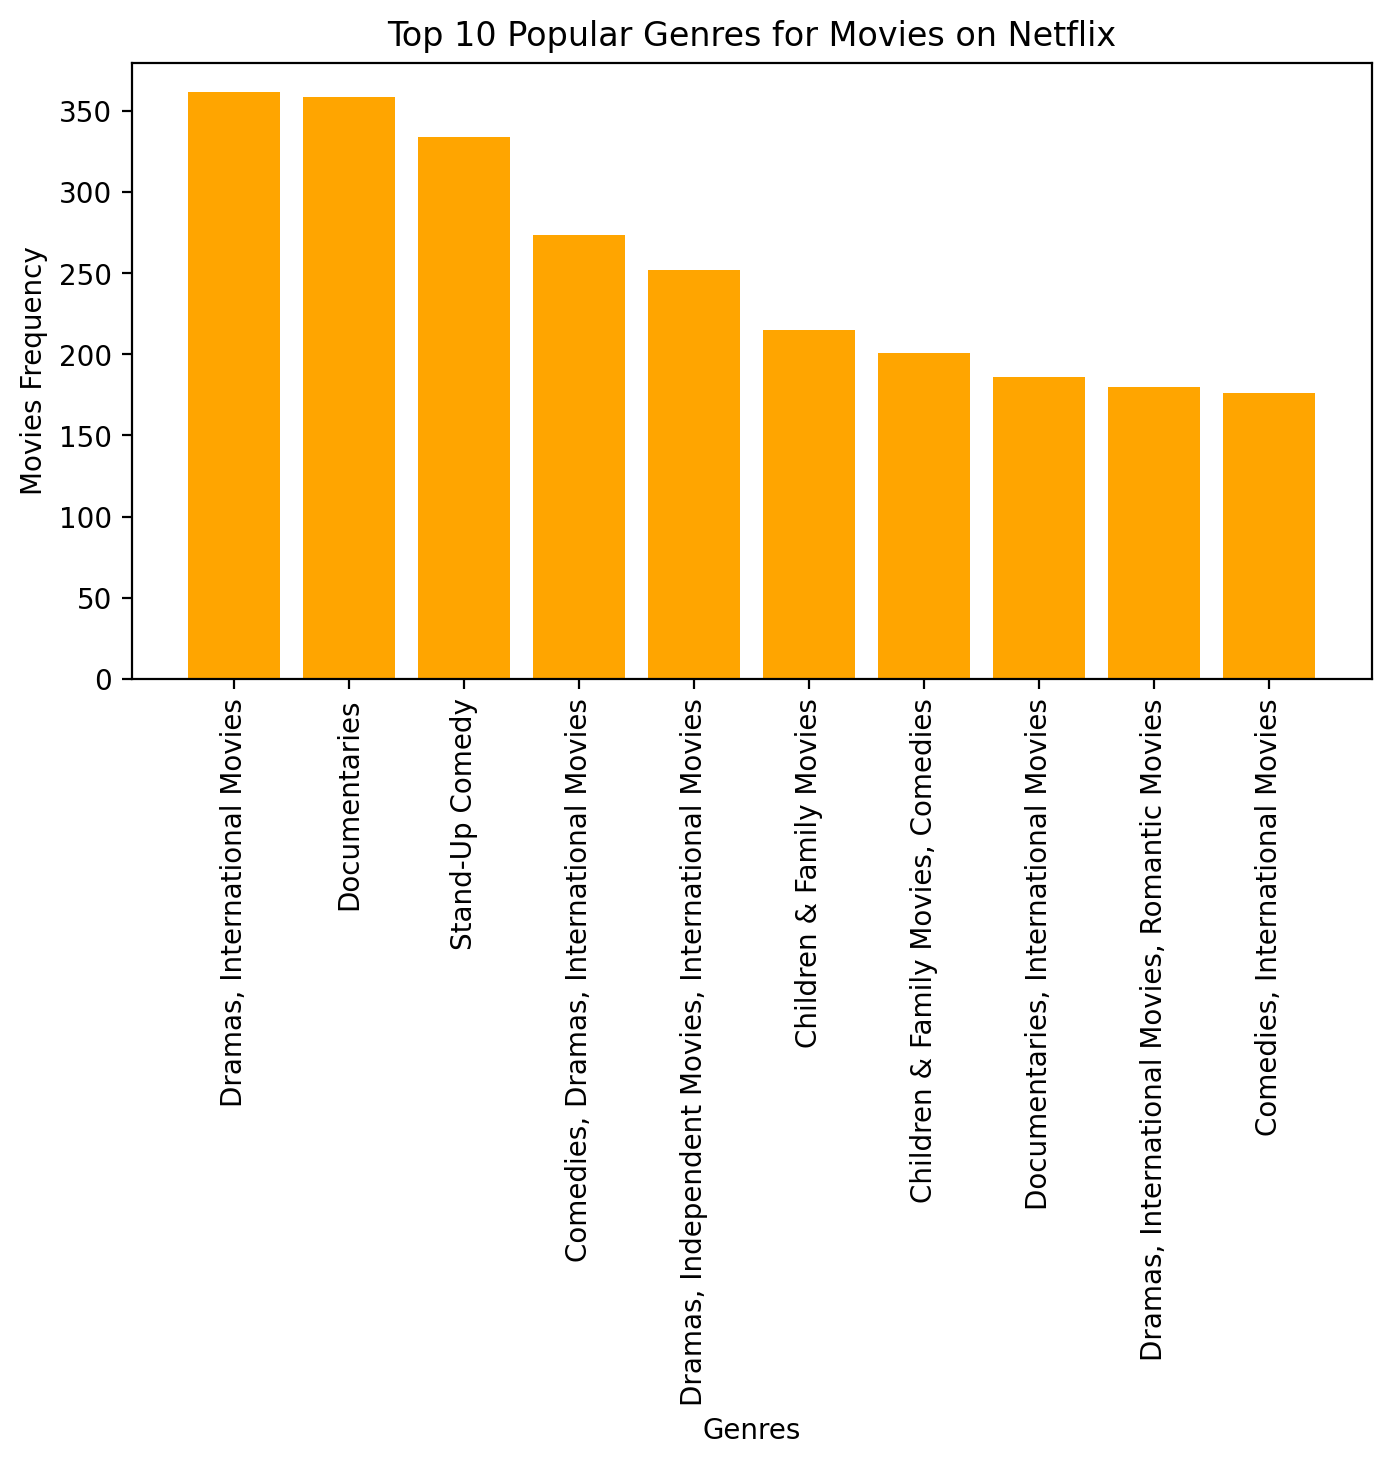

In [39]:
# Calculate the top 10 popular genres for Movies
popular_movie_genre = (
    data[data['type'] == 'Movie']
    .groupby('listed_in')
    .size()
    .sort_values(ascending=False)[:10]
)

# Calculate the top 10 popular genres for TV Shows
popular_series_genre = (
    data[data['type'] == 'TV Show']
    .groupby('listed_in')
    .size()
    .sort_values(ascending=False)[:10]
)

# Plot the top 10 genres for Movies
plt.figure(figsize=(8, 4),dpi=200)
plt.bar(popular_movie_genre.index, popular_movie_genre.values, color='orange')
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.title("Top 10 Popular Genres for Movies on Netflix")
plt.show()

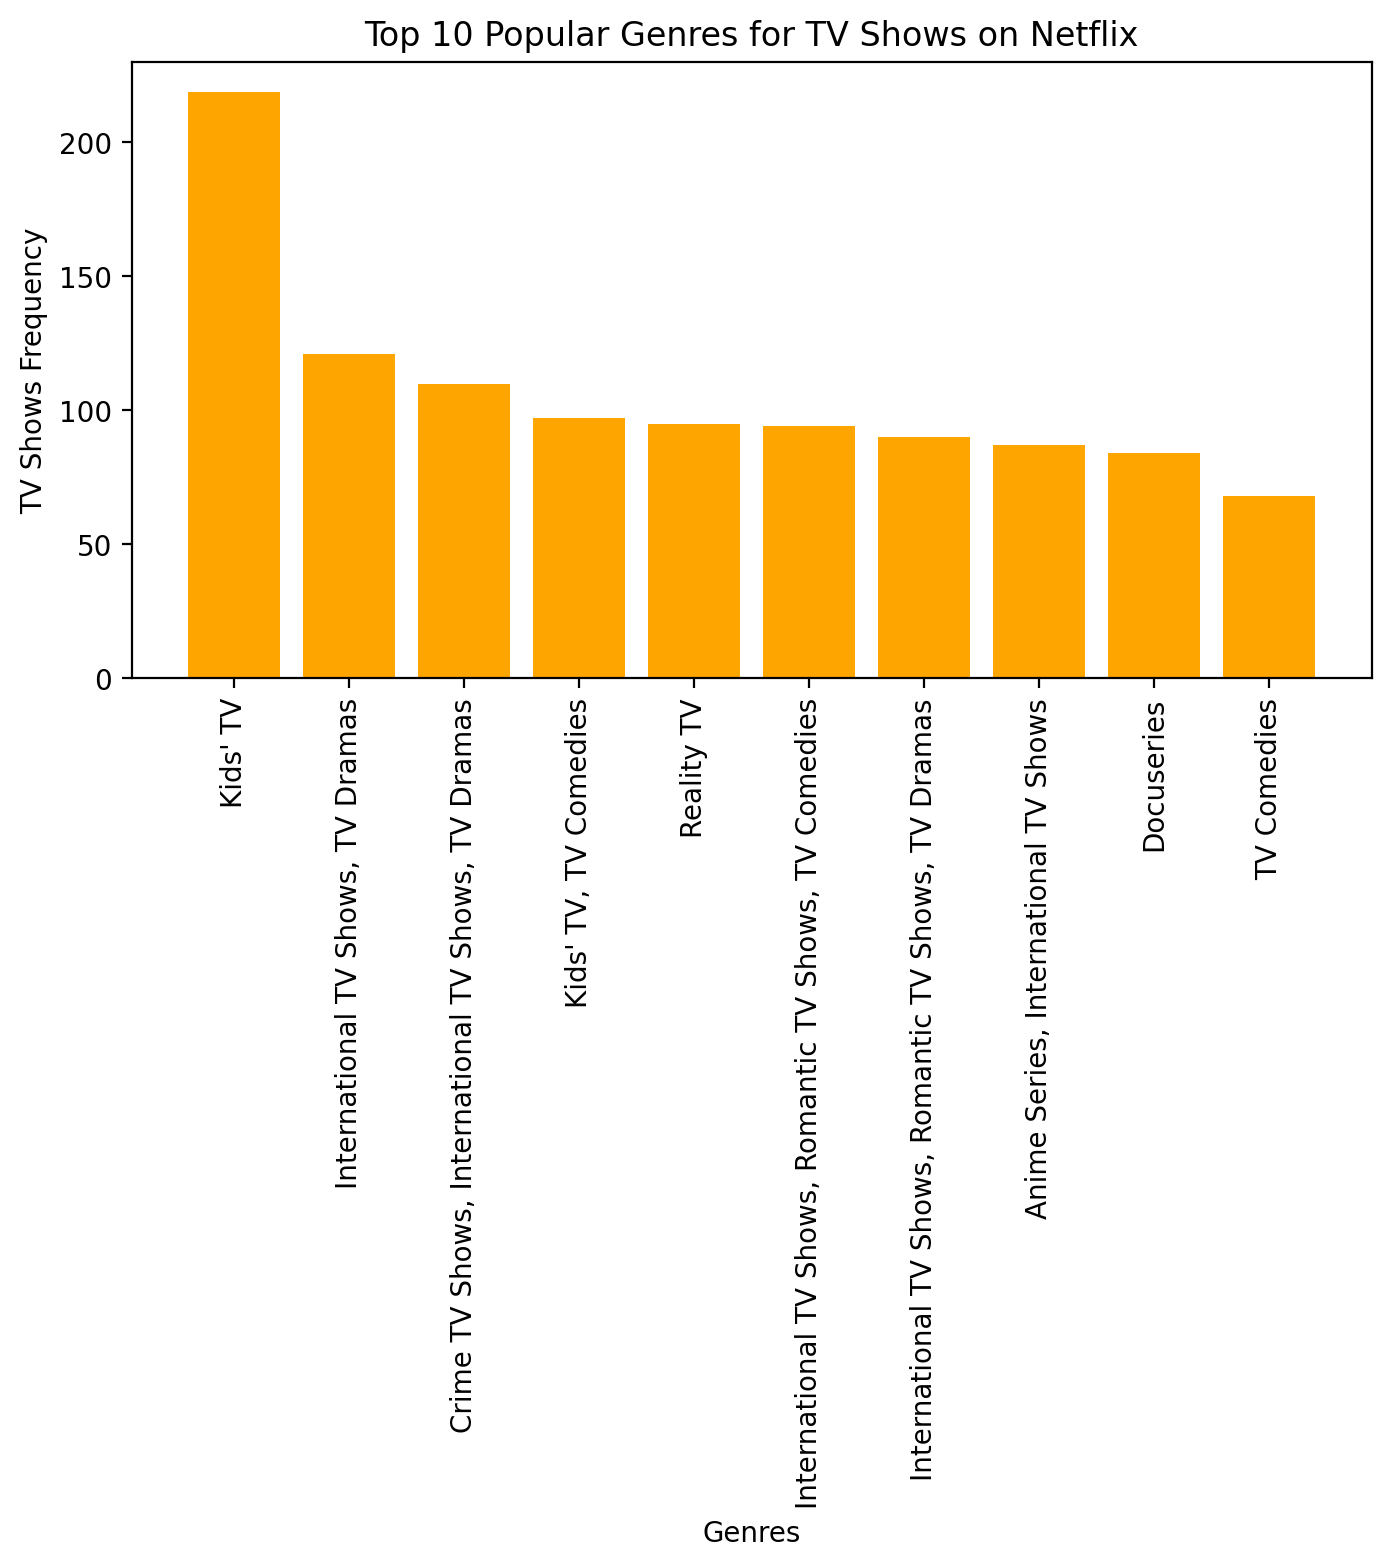

In [40]:
# Plot the top 10 genres for TV Shows
plt.figure(figsize=(8, 4),dpi=200)
plt.bar(popular_series_genre.index, popular_series_genre.values, color='orange')
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.title("Top 10 Popular Genres for TV Shows on Netflix")
plt.show()

In [41]:
# Top 15 directors across Netflix with hoigh frequency of movies and Tv shows
top_directors = data['director'].value_counts().reset_index().sort_values(by = 'count', ascending = False)[1:16]
top_directors

,director,count
1,Rajiv Chilaka,20
2,Alastair Fothergill,18
3,"Raúl Campos, Jan Suter",18
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,14
7,Cathy Garcia-Molina,13
10,Youssef Chahine,12
8,Jay Chapman,12
9,Martin Scorsese,12


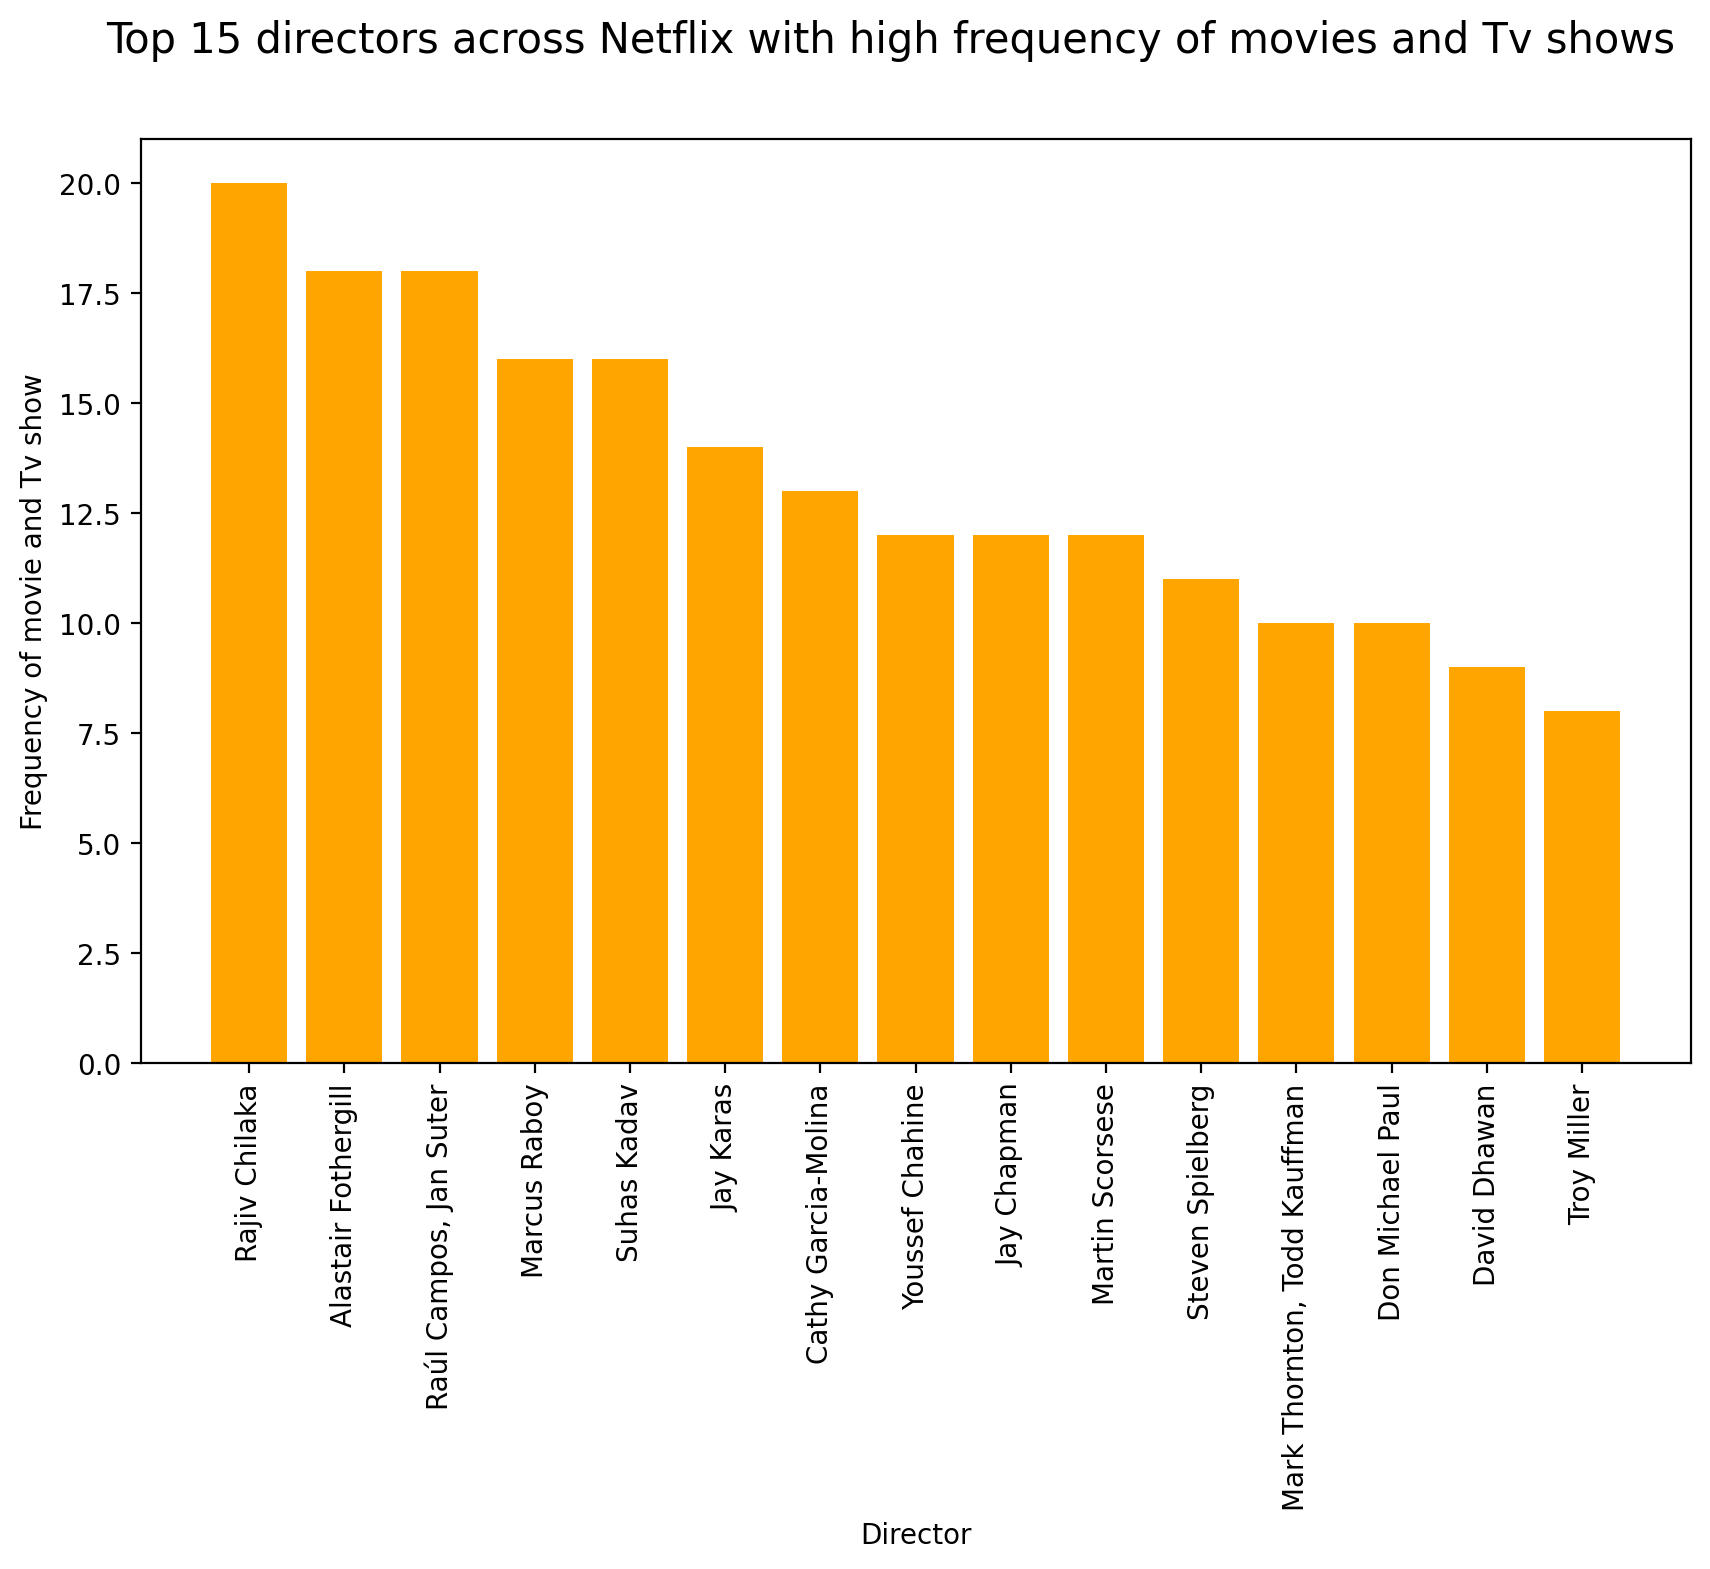

In [42]:
plt.figure(figsize = (10,6),dpi=200)
plt.bar(top_directors['director'] , top_directors['count'],color = 'orange')
plt.xticks(rotation = 90)
plt.xlabel('Director')
plt.ylabel('Frequency of movie and Tv show')
plt.suptitle('Top 15 directors across Netflix with high frequency of movies and Tv shows', fontsize = 15)
plt.show()

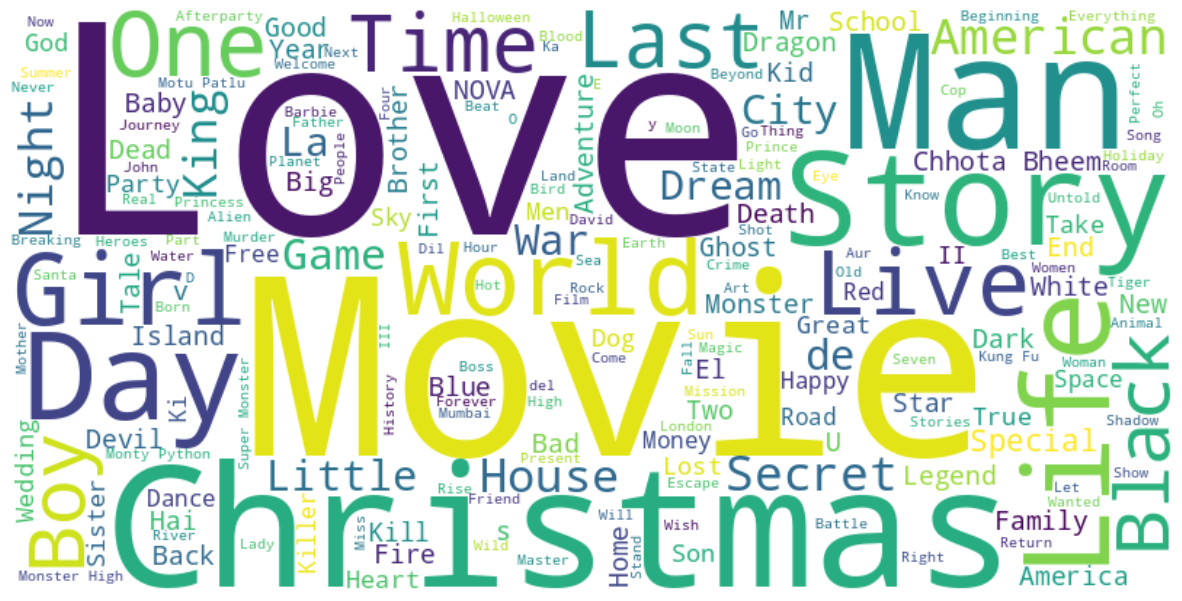

In [43]:
# filter movie titles from the dataset
movie_titles = data.loc[data['type'] == 'Movie', 'title']

# Generate a word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(' '.join(movie_titles))

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
